<h1><center>Sprint 6</center></h1>
<h2><center>Tasca 1: Algoritmes d’aprenentatge supervisat: Regressió.</center></h2>

In [ ]:
# Packages
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [ ]:
# file paths
data_path = 'D:/Sistema_Solar/Python/itacademy/sprint05/data/'
data_path = Path(data_path)
plot_path = 'D:/Sistema_Solar/Python/itacademy/itacademy-datascience/sprint05/plots/'
plot_path = Path(plot_path)

### Exercici 1 + 2
_**Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.**_

_**Compara’ls en base al MSE i al R2.**_

In [ ]:
# Apugem l'arxiu csv
file_name = 'housing data.csv'
file = data_path / file_name
housing = pd.read_csv(file, sep=',', encoding="ISO-8859-1")

# Afegim els noms de les columnes
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.columns = colnames

In [ ]:
# Separem el dataframe en un conjunt per entrenar el model i un altre per aplicar-lo.
housing_train, housing_test = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
col_sel = ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

x_train = housing_train[col_sel]
y_train = housing_train['MEDV']

x_test = housing_test[col_sel]
y_test = housing_test['MEDV']

In [ ]:
# Dataframe on emmagatzarem els coeficients MSE i R2 per comparar els diferents models.

coef_df = pd.DataFrame(index = ['MSE Test', 'MSE Train', 'R2 score Test', 'R2 score Train'])

#### 1. Model de regressió lineal

Fem un model de regressió lineal amb les variables que en el Sprint 5 vam veure que tenien més correlació amb MEDV.

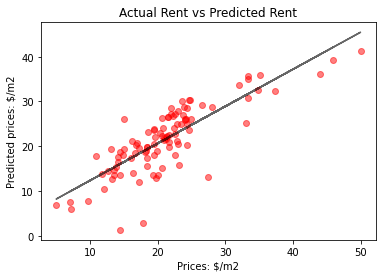

MSE Test:  20.30
MSE Train:  25.07
R2 score Test:  0.64
R2 score Train:  0.73


In [ ]:
lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)
y_predict_train = lm.predict(x_train)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)
line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = lm.score(x_test, y_test)
r2_score = lm.score(x_train, y_train)

coef_df['Reg_V'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

#### 2. Model de regressió lineal amb arbre de decissió

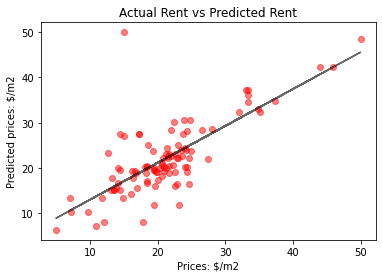

MSE Test:  30.24
MSE Train:  0.00
R2 score Test:  0.46
R2 score Train:  1.00


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
y_predict_train = dt.predict(x_train)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = dt.score(x_test, y_test)
r2_score = dt.score(x_train, y_train)

coef_df['Tree_V'] = [np.round(mse_test, 2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

Entre els dos models, el de regressió lineal mostra un MSE menor i un R2 major que el de l'arbre de decisions. Per tant, prediu millor els preus dels habitatges. En el de l'arbre de decisions, el R2 és bastant baix (0.46) i a més, comparant-ho amb el subconjunt d'entrenament (on R2=1) podem pensar que el model està sobreajustat al subconjunt d'entrenament.

### Exercici 3

__*Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.*__


Respecte el model de regressió lineal, introduirem les transformacions a les variables que vam fer al Sprint 5 per veure si millora el model.

In [ ]:
transformer = FunctionTransformer(np.log1p)

nox_train = np.array(housing_train['NOX']).reshape(-1, 1)
nox_test = np.array(housing_test['NOX']).reshape(-1, 1)

transformer.fit(nox_train)
nox_train = transformer.fit_transform(nox_train)
nox_test = transformer.fit_transform(nox_test)

In [ ]:
scaler = StandardScaler()

dist_train = np.array(housing_train['DIS']).reshape(-1, 1)

dist_train = scaler.fit_transform(dist_train)

In [ ]:
scaler = StandardScaler()

dis_train = np.array(housing_train['DIS']).reshape(-1, 1)
dis_test = np.array(housing_test['DIS']).reshape(-1, 1)

scaler.fit(dist_train)
dis_train = scaler.transform(dis_train)
dis_test = scaler.transform(dis_test)

In [ ]:
lstat_train = np.array(housing_train['LSTAT']).reshape(-1, 1)
lstat_test = np.array(housing_test['LSTAT']).reshape(-1, 1)

transformer = FunctionTransformer(np.log1p)
transformer.fit(lstat_train)

lstat_train = transformer.fit_transform(lstat_train)
lstat_test = transformer.fit_transform(lstat_test)

In [ ]:
scaler = StandardScaler()

scaler.fit(lstat_train)

lstat_train = scaler.transform(lstat_train)

lstat_test = scaler.transform(lstat_test)

In [ ]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize=True)

indus_train = np.array(housing_train['INDUS']).reshape(-1, 1)
indus_test = np.array(housing_test['INDUS']).reshape(-1, 1)

scaler.fit(indus_train)

indus_train = scaler.transform(indus_train)
indus_test = scaler.transform(indus_test)

In [ ]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize=True)

ptratio_train = np.array(housing_train['PTRATIO']).reshape(-1, 1)
ptratio_test = np.array(housing_test['PTRATIO']).reshape(-1, 1)

scaler.fit(ptratio_train)

ptratio_train = scaler.transform(ptratio_train)
ptratio_test = scaler.transform(ptratio_test)

In [ ]:
rm_train = np.array(housing_train['RM']).reshape(-1, 1)
rm_test = np.array(housing_test['RM']).reshape(-1, 1)

transformer = FunctionTransformer(np.log1p)
transformer.fit(rm_train)

rm_train = transformer.transform(rm_train)
rm_test = transformer.transform(rm_test)

In [ ]:
tax_train = np.array(housing_train['TAX']).reshape(-1, 1)
tax_test = np.array(housing_test['TAX']).reshape(-1, 1)

scaler = PowerTransformer(method='yeo-johnson', standardize=True)
scaler.fit(tax_train)


tax_train = scaler.transform(tax_train)
tax_test = scaler.transform(tax_test)

In [ ]:
scaler = PowerTransformer(method = 'box-cox', standardize=True)

age_train = np.array(housing_train['AGE']).reshape(-1, 1)
age_test = np.array(housing_test['AGE']).reshape(-1, 1)

scaler.fit(age_train)

age_train = scaler.transform(age_train)
age_test = scaler.transform(age_test)

In [ ]:
col_sel = ['INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

rad_train = np.array(housing_train['RAD']).reshape(-1, 1)
rad_test = np.array(housing_test['RAD']).reshape(-1, 1)

x_train_t = np.hstack((indus_train, nox_train, rm_train, age_train, dis_train, rad_train, tax_train, ptratio_train, lstat_train))

x_train_t = pd.DataFrame(data=x_train_t, columns=col_sel)

x_test_t = np.hstack((indus_test, nox_test, rm_test, age_test, dis_test, rad_test, tax_test, ptratio_test, lstat_test))

x_test_t = pd.DataFrame(data=x_test_t, columns=col_sel)

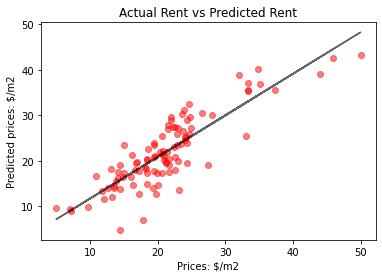

MSE Test:  16.78
MSE Train:  21.09
R2 score Test:  0.70
R2 score Train:  0.77


In [ ]:
lm = LinearRegression()

model = lm.fit(x_train_t, y_train)

y_predict= lm.predict(x_test_t)
y_predict_train = lm.predict(x_train_t)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)
line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = lm.score(x_test_t, y_test)
r2_score = lm.score(x_train_t, y_train)

coef_df['Reg_T'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

In [ ]:
coef_df['Reg_V'], coef_df['Reg_T']

(MSE Test          20.30
 MSE Train         25.07
 R2 score Test      0.64
 R2 score Train     0.73
 Name: Reg_V, dtype: float64,
 MSE Test          16.78
 MSE Train         21.09
 R2 score Test      0.70
 R2 score Train     0.77
 Name: Reg_T, dtype: float64)

Efectivament, s'observa una millora de la predictibilitat del model.
Amb el model d'arbre de decisions, podem utilitzar alguns paràmetres per intentar reduir el sobreajustament que pateix.

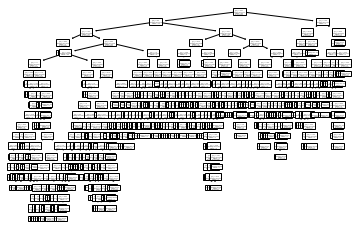

Nombre màxim de divisions:  20


In [ ]:
plt.show(tree.plot_tree(dt))
print('Nombre màxim de divisions: ',dt.get_depth())

Observem que el model realitza un gran nombre de separacions de les dades (fins a 20). Així que podem provar de reduir-lo:

Prova amb max_depth:  16


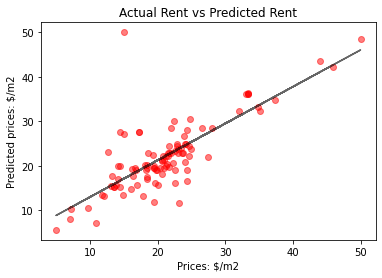

MSE Test:  27.45
MSE Train:  0.04
R2 score Test:  0.51
R2 score Train:  1.00
-----------------------------------------
Prova amb max_depth:  10


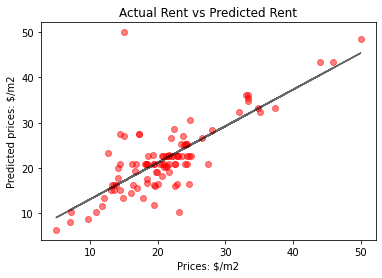

MSE Test:  28.04
MSE Train:  0.98
R2 score Test:  0.50
R2 score Train:  0.99
-----------------------------------------
Prova amb max_depth:  4


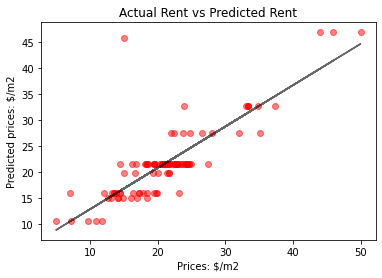

MSE Test:  18.53
MSE Train:  9.52
R2 score Test:  0.67
R2 score Train:  0.90
-----------------------------------------


In [ ]:
for depth in [16, 10, 4]:
    
    print('Prova amb max_depth: ', depth)
    
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    y_predict_train = dt.predict(x_train)

    line_fitter = LinearRegression()
    line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

    line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

    plt.scatter(y_test, y_predict, alpha=0.5, color='red')
    plt.plot(y_test, line_predict, color='black', alpha=0.6)

    plt.xlabel("Prices: $/m2")
    plt.ylabel("Predicted prices: $/m2")
    plt.title("Actual Rent vs Predicted Rent")

    plt.show()

    # Càlcul del MSE i R2

    mse_test = mean_squared_error(y_test, y_predict)
    mse_train = mean_squared_error(y_train, y_predict_train)

    r2_test = dt.score(x_test, y_test)
    r2_score = dt.score(x_train, y_train)
    
    col_name = 'Tree_MxD_' + str(depth)

    coef_df[col_name] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

    print("MSE Test:  %.2f"% mse_test)
    print("MSE Train:  %.2f"% mse_train)

    print("R2 score Test:  %.2f"% r2_test)
    print("R2 score Train:  %.2f"% r2_score)
    print('-----------------------------------------')

S'observa una millora del model al reduir el paràmetre max_depth del model.

Prova amb max_depth:  2


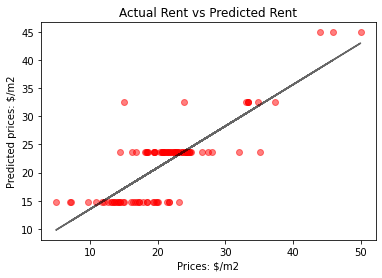

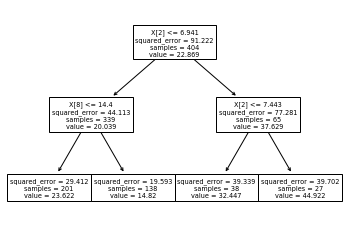

MSE Test:  18.31
MSE Train:  27.68
R2 score Test:  0.67
R2 score Train:  0.70
-----------------------------------------
Prova amb max_depth:  3


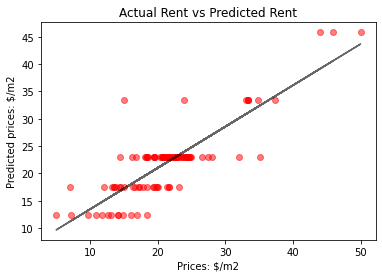

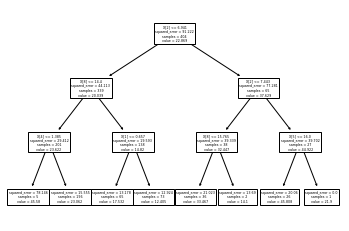

MSE Test:  16.45
MSE Train:  16.20
R2 score Test:  0.70
R2 score Train:  0.82
-----------------------------------------
Prova amb max_depth:  4


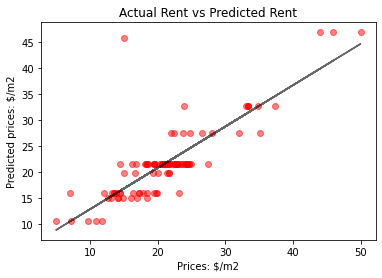

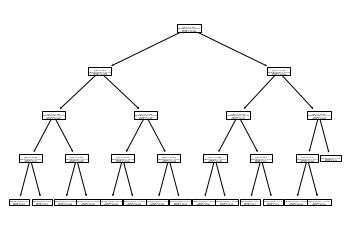

MSE Test:  18.53
MSE Train:  9.52
R2 score Test:  0.67
R2 score Train:  0.90
-----------------------------------------
Prova amb max_depth:  5


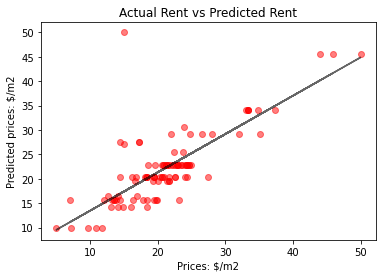

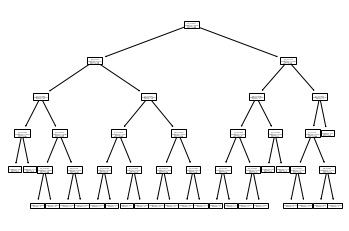

MSE Test:  25.14
MSE Train:  7.12
R2 score Test:  0.55
R2 score Train:  0.92
-----------------------------------------


In [ ]:
for depth in range(2, 6):
    
    print('Prova amb max_depth: ', depth)
    
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    y_predict_train = dt.predict(x_train)

    line_fitter = LinearRegression()
    line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

    line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

    plt.scatter(y_test, y_predict, alpha=0.5, color='red')
    plt.plot(y_test, line_predict, color='black', alpha=0.6)

    plt.xlabel("Prices: $/m2")
    plt.ylabel("Predicted prices: $/m2")
    plt.title("Actual Rent vs Predicted Rent")

    plt.show()
    
    plt.show(tree.plot_tree(dt))

    # Càlcul del MSE i R2

    mse_test = mean_squared_error(y_test, y_predict)
    mse_train = mean_squared_error(y_train, y_predict_train)

    r2_test = dt.score(x_test, y_test)
    r2_score = dt.score(x_train, y_train)
    
    col_name = 'Tree_MxD_' + str(depth)

    coef_df[col_name] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

    print("MSE Test:  %.2f"% mse_test)
    print("MSE Train:  %.2f"% mse_train)

    print("R2 score Test:  %.2f"% r2_test)
    print("R2 score Train:  %.2f"% r2_score)
    print('-----------------------------------------')

Amb un paràmetre max_depth=3 és quan trobem la millor predictibilitat per al nostre model i una diferència menor entre R2 dels subconjunts de test i de train. Altre paràmetre que podem modificar és min_samples_split, que serà el mínim nombre de mostres que haurà de tindre un node perquè es pugui tornar a dividir. El provarem amb un número major de max_depth.

Prova amb min_samples:  40


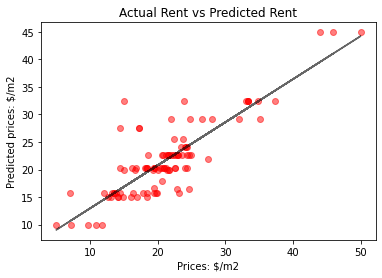

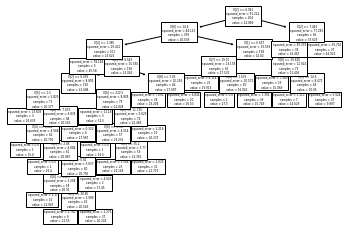

MSE Test:  15.91
MSE Train:  11.60
R2 score Test:  0.71
R2 score Train:  0.87
Detph:  12
Number of leaves:  24
-----------------------------------------
Prova amb min_samples:  20


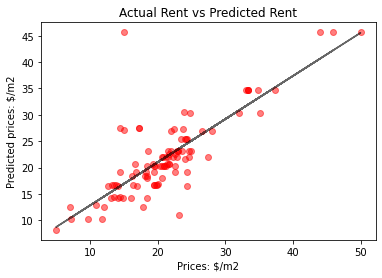

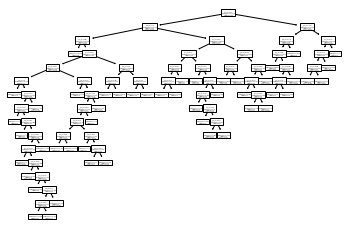

MSE Test:  22.56
MSE Train:  5.07
R2 score Test:  0.60
R2 score Train:  0.94
Detph:  15
Number of leaves:  48
-----------------------------------------
Prova amb min_samples:  10


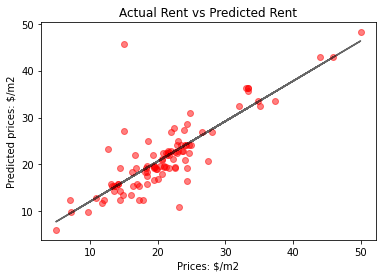

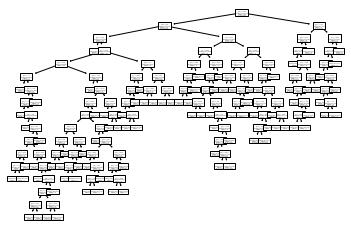

MSE Test:  20.02
MSE Train:  3.03
R2 score Test:  0.64
R2 score Train:  0.97
Detph:  16
Number of leaves:  91
-----------------------------------------
Prova amb min_samples:  5


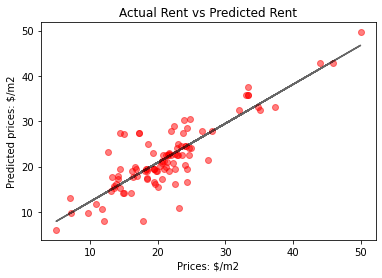

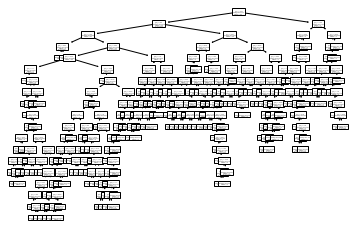

MSE Test:  16.43
MSE Train:  0.95
R2 score Test:  0.71
R2 score Train:  0.99
Detph:  18
Number of leaves:  169
-----------------------------------------


In [ ]:
for min_samples in [40, 20, 10, 5]:
    
    print('Prova amb min_samples: ', min_samples)
    
    dt = DecisionTreeRegressor(min_samples_split=min_samples, random_state=42)
    dt.fit(x_train, y_train)
    y_predict = dt.predict(x_test)
    y_predict_train = dt.predict(x_train)

    line_fitter = LinearRegression()
    line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

    line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

    plt.scatter(y_test, y_predict, alpha=0.5, color='red')
    plt.plot(y_test, line_predict, color='black', alpha=0.6)

    plt.xlabel("Prices: $/m2")
    plt.ylabel("Predicted prices: $/m2")
    plt.title("Actual Rent vs Predicted Rent")

    plt.show()
    plt.show(tree.plot_tree(dt))
    
    # Càlcul del MSE i R2

    mse_test = mean_squared_error(y_test, y_predict)
    mse_train = mean_squared_error(y_train, y_predict_train)

    r2_test = dt.score(x_test, y_test)
    r2_score = dt.score(x_train, y_train)
    
    col_name = 'Tree_MnS_' + str(min_samples)

    coef_df[col_name] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

    print("MSE Test:  %.2f"% mse_test)
    print("MSE Train:  %.2f"% mse_train)

    print("R2 score Test:  %.2f"% r2_test)
    print("R2 score Train:  %.2f"% r2_score)
    
    print('Detph: ', dt.get_depth())
    print('Number of leaves: ', dt.get_n_leaves())
    print('-----------------------------------------')

In [ ]:
# S'ordena la taula de coeficients
coef_df = coef_df[['Reg_V', 'Tree_V', 'Reg_T', 'Tree_MxD_2', 'Tree_MxD_3', 'Tree_MxD_4', 'Tree_MxD_5', 
                   'Tree_MxD_10', 'Tree_MxD_16', 'Tree_MnS_5', 'Tree_MnS_10', 'Tree_MnS_20', 'Tree_MnS_40']]

In [ ]:
coef_df

,Reg_V,Tree_V,Reg_T,Tree_MxD_2,Tree_MxD_3,Tree_MxD_4,Tree_MxD_5,Tree_MxD_10,Tree_MxD_16,Tree_MnS_5,Tree_MnS_10,Tree_MnS_20,Tree_MnS_40
MSE Test,20.30,30.24,16.78,18.31,16.45,18.53,25.14,28.04,27.45,16.43,20.02,22.56,15.91
MSE Train,25.07,0.00,21.09,27.68,16.20,9.52,7.12,0.98,0.04,0.95,3.03,5.07,11.60
R2 score Test,0.64,0.46,0.70,0.67,0.70,0.67,0.55,0.50,0.51,0.71,0.64,0.60,0.71
R2 score Train,0.73,1.00,0.77,0.70,0.82,0.90,0.92,0.99,1.00,0.99,0.97,0.94,0.87


A la vista dels resultats, podem utilitzar un max_depth de 6, per tal que l'arbre no es faci massa llarg i es sobreajuste al subconjunt d'entrenament i limitant també les separacions amb el paràmetre min_samples_split.

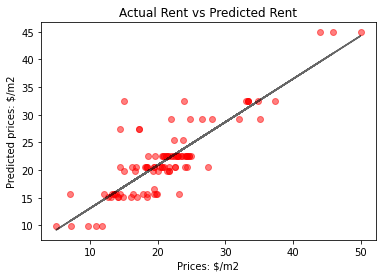

MSE Test:  15.24
MSE Train:  12.55
R2 score Test:  0.73
R2 score Train:  0.86


In [ ]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=40, random_state=42)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
y_predict_train = dt.predict(x_train)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = dt.score(x_test, y_test)
r2_score = dt.score(x_train, y_train)

coef_df['Tree_Opt'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

### Exercici 5
__*No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.*__

#### 1. Model de regressió lineal

In [ ]:
col_sel = ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

x_train = housing_train[col_sel]
y_train = housing_train['MEDV']

x_test = housing_test[col_sel]
y_test = housing_test['MEDV']

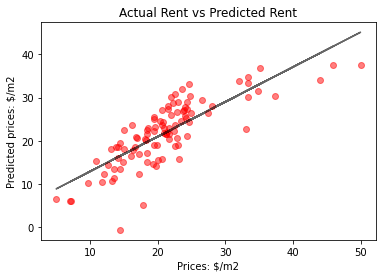

MSE Test:  22.28
MSE Train:  29.66
R2 score Test:  0.60
R2 score Train:  0.67


In [ ]:
# Sense transformar prèviament les dades

lm = LinearRegression()

model = lm.fit(x_train, y_train)

y_predict = lm.predict(x_test)
y_predict_train = lm.predict(x_train)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)
line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = lm.score(x_test, y_test)
r2_score = lm.score(x_train, y_train)

coef_df['Reg_NoRM'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

In [ ]:
x_train_t = np.hstack((indus_train, nox_train, age_train, dis_train, rad_train, tax_train, ptratio_train, lstat_train))
x_train_t = pd.DataFrame(data=x_train_t, columns=col_sel)
x_test_t = np.hstack((indus_test, nox_test, age_test, dis_test, rad_test, tax_test, ptratio_test, lstat_test))
x_test_t = pd.DataFrame(data=x_test_t, columns=col_sel)

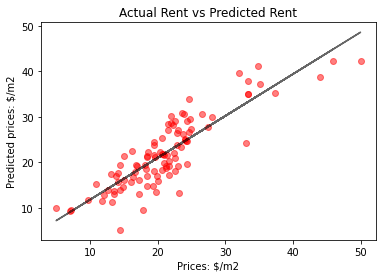

MSE Test:  16.86
MSE Train:  22.35
R2 score Test:  0.70
R2 score Train:  0.75


In [ ]:
# Transformant les dades

lm = LinearRegression()

model = lm.fit(x_train_t, y_train)

y_predict = lm.predict(x_test_t)
y_predict_train = lm.predict(x_train_t)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)
line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = lm.score(x_test_t, y_test)
r2_score = lm.score(x_train_t, y_train)

coef_df['Reg_T_NoRM'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

#### 2. Model de regressió lineal amb arbre de decissió

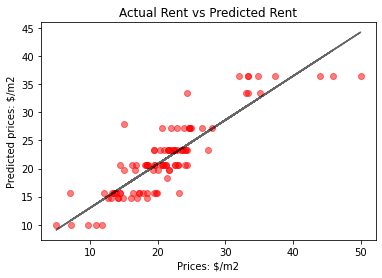

MSE Test:  13.05
MSE Train:  14.57
R2 score Test:  0.77
R2 score Train:  0.84


In [ ]:
dt = DecisionTreeRegressor(max_depth=6, min_samples_split=40, random_state=42)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
y_predict_train = dt.predict(x_train)

line_fitter = LinearRegression()
line_fitter.fit(np.array(y_test).reshape(-1, 1), y_predict)

line_predict = line_fitter.predict(np.array(y_test).reshape(-1, 1))

plt.scatter(y_test, y_predict, alpha=0.5, color='red')
plt.plot(y_test, line_predict, color='black', alpha=0.6)

plt.xlabel("Prices: $/m2")
plt.ylabel("Predicted prices: $/m2")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

# Càlcul del MSE i R2

mse_test = mean_squared_error(y_test, y_predict)
mse_train = mean_squared_error(y_train, y_predict_train)

r2_test = dt.score(x_test, y_test)
r2_score = dt.score(x_train, y_train)

coef_df['Tree_NoRM'] = [np.round(mse_test,2), np.round(mse_train, 2), np.round(r2_test, 2), np.round(r2_score, 2)]

print("MSE Test:  %.2f"% mse_test)
print("MSE Train:  %.2f"% mse_train)

print("R2 score Test:  %.2f"% r2_test)
print("R2 score Train:  %.2f"% r2_score)

In [ ]:
coef_df[['Reg_V', 'Reg_NoRM', 'Reg_T', 'Reg_T_NoRM']]
# Reg_V = Regressió Lineal sense transformar les dades
# Reg_NoRM = Regressió Lineal sense transformar les dades i sense la variable RM
# Reg_T = Regressió Lineal transformant les dades
# Reg_T_NoRM = Regressió Lineal transformant les dades i sense la variable RM

,Reg_V,Reg_NoRM,Reg_T,Reg_T_NoRM
MSE Test,20.30,22.28,16.78,16.86
MSE Train,25.07,29.66,21.09,22.35
R2 score Test,0.64,0.60,0.70,0.70
R2 score Train,0.73,0.67,0.77,0.75


In [36]:
coef_df[['Tree_Opt', 'Tree_NoRM']]

# Tree_Opt = Model de regressió amb arbre de decissions optimitzat (max_depth=6, min_samples_split=40)
# Tree_NoRM = Ídem però sense utilitzar la  variable RM

,Tree_Opt,Tree_NoRM
MSE Test,15.24,13.05
MSE Train,12.55,14.57
R2 score Test,0.73,0.77
R2 score Train,0.86,0.84


Quan no s'utilitza la variable RM, els models mantenen la seva capacitat predictora (cas **Reg_T_NoRM** vs **Reg_T**), o no es perd massa capacitat (**Reg_NoRM** vs **Reg_V**) inclús, utilitzant l'arbre de decisió, el model incrementa la seva predictibilitat reduint el sobreajustament (**Tree_NoRM** vs **Tree_Opt**).